<a href="https://colab.research.google.com/github/diegomrodrigues/generative_models_experiments/blob/main/pPCA%20Limitations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

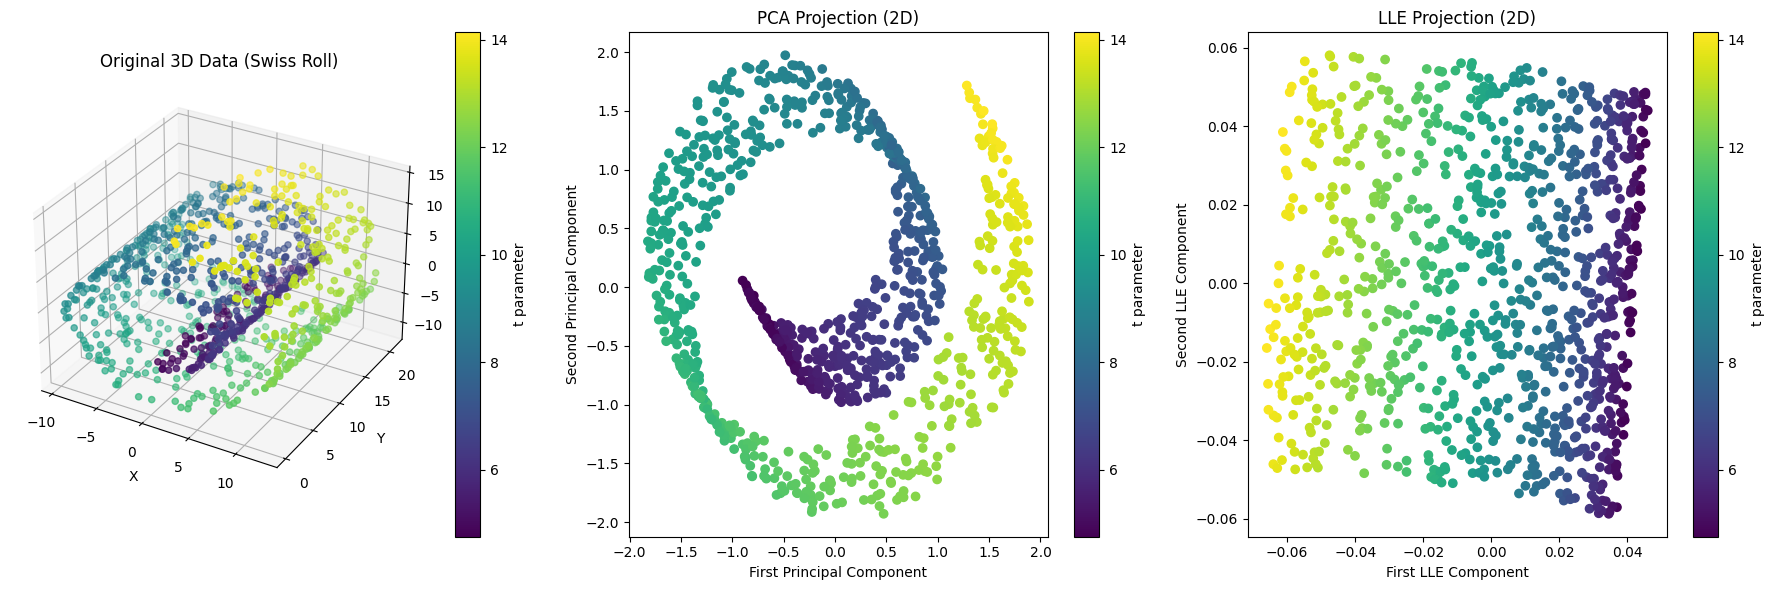

Explanation of the Visualization:
1. Original 3D Data (Swiss Roll):
   - This plot shows the original non-linear data in 3D space.
   - The data forms a 'swiss roll' shape, which is inherently non-linear.
   - Colors represent the 't' parameter, which spirals along the roll.

2. PCA Projection (2D):
   - This plot shows the result of applying PCA to reduce the data to 2D.
   - Notice how the colors are mixed and the structure is lost.
   - PCA fails to preserve the intrinsic structure of the data due to its linearity assumption.

3. LLE Projection (2D):
   - This plot shows the result of applying Locally Linear Embedding (LLE), a non-linear method.
   - Observe how the colors transition smoothly, preserving the local structure of the data.
   - LLE captures the intrinsic manifold of the swiss roll, demonstrating its superiority for non-linear data.

Conclusion:
This visualization clearly demonstrates the limitations of linear methods like PCA
when dealing with non-linear data structure

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linear data (Swiss roll dataset)
def generate_swiss_roll(n_samples=1000, noise=0.1):
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_samples))
    x = t * np.cos(t)
    y = 21 * np.random.rand(n_samples)
    z = t * np.sin(t)
    X = np.column_stack((x, y, z))
    X += noise * np.random.randn(n_samples, 3)
    return X, t

# Generate data
X, t = generate_swiss_roll(n_samples=1000, noise=0.05)

# Apply PCA
pca = PCA(n_components=2, svd_solver='full', whiten=True)
X_pca = pca.fit_transform(X)

# Apply LLE (Locally Linear Embedding) for comparison
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='modified')
X_lle = lle.fit_transform(X)

# Create the main figure
fig = plt.figure(figsize=(18, 6))

# Plot original data
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis')
ax1.set_title("Original 3D Data (Swiss Roll)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Plot PCA result
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap='viridis')
ax2.set_title("PCA Projection (2D)")
ax2.set_xlabel("First Principal Component")
ax2.set_ylabel("Second Principal Component")

# Plot LLE result
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(X_lle[:, 0], X_lle[:, 1], c=t, cmap='viridis')
ax3.set_title("LLE Projection (2D)")
ax3.set_xlabel("First LLE Component")
ax3.set_ylabel("Second LLE Component")

# Add colorbars
fig.colorbar(scatter1, ax=ax1, label='t parameter')
fig.colorbar(scatter2, ax=ax2, label='t parameter')
fig.colorbar(scatter3, ax=ax3, label='t parameter')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Explanation of the visualization
print("Explanation of the Visualization:")
print("1. Original 3D Data (Swiss Roll):")
print("   - This plot shows the original non-linear data in 3D space.")
print("   - The data forms a 'swiss roll' shape, which is inherently non-linear.")
print("   - Colors represent the 't' parameter, which spirals along the roll.")
print("\n2. PCA Projection (2D):")
print("   - This plot shows the result of applying PCA to reduce the data to 2D.")
print("   - Notice how the colors are mixed and the structure is lost.")
print("   - PCA fails to preserve the intrinsic structure of the data due to its linearity assumption.")
print("\n3. LLE Projection (2D):")
print("   - This plot shows the result of applying Locally Linear Embedding (LLE), a non-linear method.")
print("   - Observe how the colors transition smoothly, preserving the local structure of the data.")
print("   - LLE captures the intrinsic manifold of the swiss roll, demonstrating its superiority for non-linear data.")
print("\nConclusion:")
print("This visualization clearly demonstrates the limitations of linear methods like PCA")
print("when dealing with non-linear data structures. While PCA fails to capture the")
print("intrinsic structure of the swiss roll, non-linear methods like LLE can effectively")
print("represent the data in a lower-dimensional space while preserving its essential characteristics.")

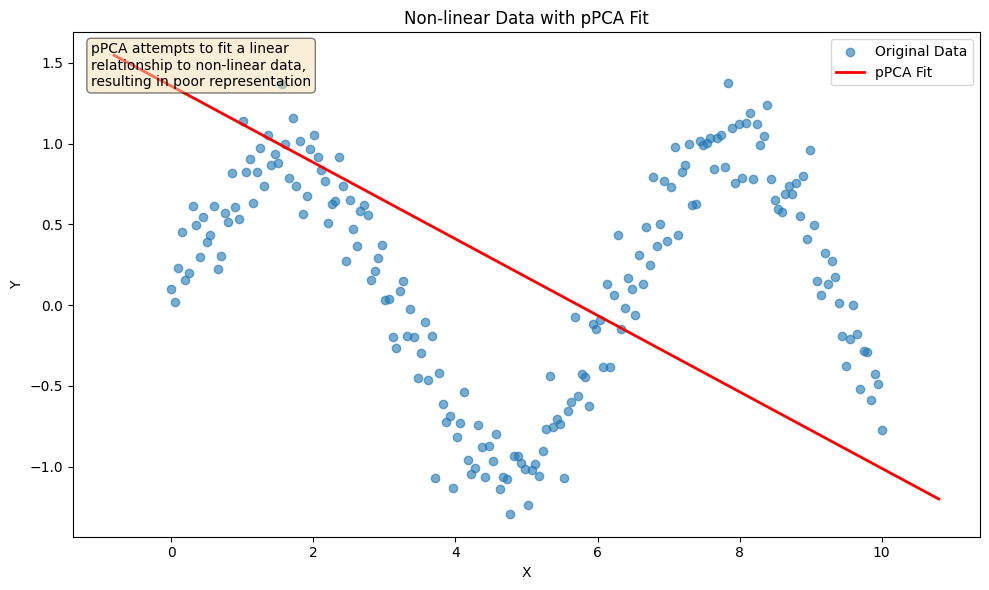

Explained variance ratio: 0.5258

Explanation of the Visualization:
1. Original Data (Blue Points):
   - The scattered blue points represent the original non-linear data.
   - The data follows a sinusoidal pattern, clearly showing a non-linear relationship between X and Y.

2. pPCA Fit (Red Line):
   - The red line represents the pPCA's attempt to fit the data.
   - Notice how the straight line fails to capture the curvature of the data.
   - pPCA, being a linear method, can only provide a linear approximation of the relationship.

3. Explained Variance Ratio: 0.5258
   - This value indicates how much of the data's variance is explained by the pPCA model.
   - A low value suggests that the linear model poorly represents the non-linear data.

Conclusion:
This visualization clearly demonstrates the limitation of pPCA when dealing with
non-linear relationships. The sinusoidal pattern of the data cannot be adequately
captured by the linear pPCA model, resulting in a poor fit and loss of im

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linear data
def generate_nonlinear_data(n_samples=1000, noise=0.1):
    x = np.linspace(0, 10, n_samples)
    y = np.sin(x) + noise * np.random.randn(n_samples)
    return x.reshape(-1, 1), y.reshape(-1, 1)

# Generate data
X, y = generate_nonlinear_data(n_samples=200, noise=0.2)

# Combine X and y for pPCA
data = np.hstack((X, y))

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Probabilistic PCA
ppca = PCA(n_components=2, svd_solver='full', whiten=True)
ppca.fit(data_scaled)

# Generate points along the pPCA line
line_x = np.array([-2, 2])
line_y = ppca.mean_[1] + line_x * ppca.components_[0, 1] / ppca.components_[0, 0]

# Create the main figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data
ax.scatter(X, y, alpha=0.6, label='Original Data')

# Plot pPCA line
line_x_original = scaler.inverse_transform(np.column_stack((line_x, line_y)))[:, 0]
line_y_original = scaler.inverse_transform(np.column_stack((line_x, line_y)))[:, 1]
ax.plot(line_x_original, line_y_original, color='red', linewidth=2, label='pPCA Fit')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Non-linear Data with pPCA Fit')
ax.legend()

# Add text explanation
ax.text(0.02, 0.98, 'pPCA attempts to fit a linear\nrelationship to non-linear data,\nresulting in poor representation',
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show plot
plt.tight_layout()
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {ppca.explained_variance_ratio_[0]:.4f}")

# Explanation of the visualization
print("\nExplanation of the Visualization:")
print("1. Original Data (Blue Points):")
print("   - The scattered blue points represent the original non-linear data.")
print("   - The data follows a sinusoidal pattern, clearly showing a non-linear relationship between X and Y.")
print("\n2. pPCA Fit (Red Line):")
print("   - The red line represents the pPCA's attempt to fit the data.")
print("   - Notice how the straight line fails to capture the curvature of the data.")
print("   - pPCA, being a linear method, can only provide a linear approximation of the relationship.")
print(f"\n3. Explained Variance Ratio: {ppca.explained_variance_ratio_[0]:.4f}")
print("   - This value indicates how much of the data's variance is explained by the pPCA model.")
print("   - A low value suggests that the linear model poorly represents the non-linear data.")
print("\nConclusion:")
print("This visualization clearly demonstrates the limitation of pPCA when dealing with")
print("non-linear relationships. The sinusoidal pattern of the data cannot be adequately")
print("captured by the linear pPCA model, resulting in a poor fit and loss of important")
print("structural information in the data.")